<a href="https://colab.research.google.com/github/Hanbin-git/practice/blob/main/test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install timm
!pip install scikit-learn


In [3]:
!pip install efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=0cae1a9d0222f9971b2d566abfa7e903accb14b306c9399d3bca403afdb513aa
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch


In [4]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/open.zip"
extract_path = "/content/open"

# 압축 해제
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 경로 확인
print("압축 해제 완료. 폴더 구조:")
print(os.listdir(extract_path))  # ['train', 'test', 'sample_submission.csv', ...]


압축 해제 완료. 폴더 구조:
['test', 'test.csv', 'train', 'sample_submission.csv']


In [5]:
import os

ROOT_DIR = "/content/open"
TRAIN_DIR = os.path.join(ROOT_DIR, "train")
TEST_DIR = os.path.join(ROOT_DIR, "test")
TEST_CSV = os.path.join(ROOT_DIR, "test.csv")
SUBMIT_CSV = os.path.join(ROOT_DIR, "sample_submission.csv")

print("📂 경로 점검:")
print("TRAIN_DIR:", TRAIN_DIR)
print("TEST_DIR:", TEST_DIR)
print("TEST_CSV:", TEST_CSV)
print("SUBMIT_CSV:", SUBMIT_CSV)


📂 경로 점검:
TRAIN_DIR: /content/open/train
TEST_DIR: /content/open/test
TEST_CSV: /content/open/test.csv
SUBMIT_CSV: /content/open/sample_submission.csv


✅ 클래스 수 (정상 폴더 기준): 396
예시 클래스: ['1시리즈_F20_2013_2015', '1시리즈_F20_2016_2019', '1시리즈_F40_2020_2024', '2008_2015_2017', '2시리즈_그란쿠페_F44_2020_2024']


<ipython-input-6-6dd5a50c2c3f>:33: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-6dd5a50c2c3f>:33: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-6dd5a50c2c3f>:33: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-6dd5a50c2c3f>:33: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-6dd5a50c2c3f>:33: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-6dd5a50c2c3f>:33: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-6dd5a50c2c3f>:33: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-6

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

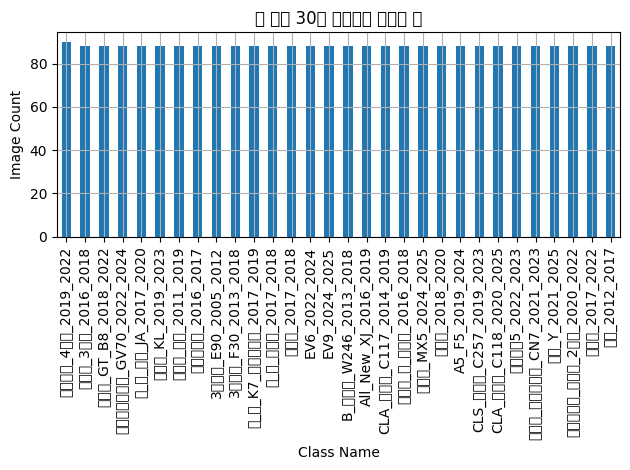

In [6]:
# 클래스 폴더만 필터링 (예: ID 또는 기타 파일 제거)
all_class_names = sorted([
    d for d in os.listdir(TRAIN_DIR)
    if os.path.isdir(os.path.join(TRAIN_DIR, d)) and not d.startswith(".")
])

print(f"✅ 클래스 수 (정상 폴더 기준): {len(all_class_names)}")
print("예시 클래스:", all_class_names[:5])

import pandas as pd
import matplotlib.pyplot as plt

# 클래스별 이미지 수 계산
class_counts = {
    cls: len([
        f for f in os.listdir(os.path.join(TRAIN_DIR, cls))
        if f.endswith(".jpg")
    ])
    for cls in all_class_names
}

class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['count'])
class_counts_df = class_counts_df.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
class_counts_df.head(30).plot(kind='bar', legend=False)
plt.title('💡 상위 30개 클래스별 이미지 수')
plt.ylabel('Image Count')
plt.xlabel('Class Name')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import torch

CFG = {
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu"
}
print("✅ 사용 디바이스:", CFG["DEVICE"])


✅ 사용 디바이스: cuda


In [8]:
import os
import pandas as pd

# 경로 설정
ROOT_DIR = '/content/open'  # 압축 해제 경로 기준
TRAIN_DIR = os.path.join(ROOT_DIR, 'train')

# 클래스 디렉토리 목록 가져오기
all_items = os.listdir(TRAIN_DIR)

# 폴더만 추출 (ID.csv 등 일반 파일 제거)
class_dirs = [d for d in all_items if os.path.isdir(os.path.join(TRAIN_DIR, d))]

# 클래스 수 확인
print(f"✅ 총 유효 클래스 수 (디렉토리 기준): {len(class_dirs)}")

# 각 클래스별 이미지 개수 확인
class_counts = {
    cls: len([
        f for f in os.listdir(os.path.join(TRAIN_DIR, cls))
        if f.lower().endswith('.jpg')
    ])
    for cls in class_dirs
}

# 결과를 DataFrame으로 정리
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['count'])
class_counts_df = class_counts_df.sort_values(by='count', ascending=False)

# 상위 30개 클래스 출력
print("\n📌 상위 30개 클래스:")
print(class_counts_df.head(30))


✅ 총 유효 클래스 수 (디렉토리 기준): 396

📌 상위 30개 클래스:
                        count
프리우스_4세대_2019_2022         90
CLA_클래스_C118_2020_2025     88
스팅어_마이스터_2021_2023         88
더_뉴_렉스턴_스포츠_2021_2025      88
X1_F48_2016_2019           88
시에나_4세대_2021_2024          88
아이오닉5_2022_2023            88
파일럿_3세대_2016_2018          88
체로키_KL_2019_2023           88
XJ_8세대_2010_2019           88
GLC_클래스_X253_2017_2019     88
Q5_FY_2020                 88
올_뉴_말리부_2017_2018          88
뉴_SM5_플래티넘_2013_2014       88
쿠퍼_컨트리맨_2012_2015          88
X5_F15_2014_2018           88
7시리즈_G11_2019_2022         88
파사트_GT_B8_2018_2022        88
Q30_2017_2019              88
더_올뉴투싼_하이브리드_2021_2023     88
3시리즈_E90_2005_2012         88
B_클래스_W246_2013_2018       88
S_클래스_W222_2014_2020       88
CLS_클래스_C257_2019_2023     88
All_New_XJ_2016_2019       88
스팅어_2018_2020              88
뉴_A6_2012_2014             88
XE_2016_2019               88
뷰티풀_코란도_2019_2024          88
레인지로버_벨라_2018_2019         88


In [13]:
import os
import glob
import numpy as np
import torch
import random
from sklearn.model_selection import StratifiedKFold
from collections import Counter

# ✅ Config
CFG = {
    "IMG_SIZE": 384,
    "EPOCHS": 10,
    "LEARNING_RATE": 1e-4,
    "BATCH_SIZE": 64,
    "SEED": 42,
    "N_CLASSES": 396,
    "LABEL_SMOOTHING": 0.1,
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu"
}

# ✅ Seed
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

set_seed(CFG["SEED"])

# ✅ 경로
ROOT_DIR = '/content/drive/MyDrive/fuck/preprocessed'
BATCH_DIRS = sorted(glob.glob(os.path.join(ROOT_DIR, 'batch_*')))

# ✅ 이미지 수집
file_paths, labels, class_names = [], [], []

for i, batch_dir in enumerate(BATCH_DIRS):
    class_name = os.path.basename(batch_dir)
    class_names.append(class_name)

    img_files = glob.glob(os.path.join(batch_dir, "*"))
    img_files = [f for f in img_files if f.lower().endswith('.jpg')]  # 확장자 체크 강화

    if len(img_files) == 0:
        print(f"⚠️ 이미지 없음: {batch_dir}")
        continue  # 이 폴더는 생략

    file_paths.extend(img_files)
    labels.extend([i] * len(img_files))

# ✅ 파일 개수 체크
if len(file_paths) == 0:
    raise ValueError("❌ 이미지가 1개도 로딩되지 않았습니다. 경로/확장자를 점검하세요.")

file_paths = np.array(file_paths)
labels = np.array(labels)

# ✅ Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=CFG["SEED"])
train_idx, val_idx = list(skf.split(file_paths, labels))[0]

train_paths, val_paths = file_paths[train_idx], file_paths[val_idx]
train_labels, val_labels = labels[train_idx], labels[val_idx]

# ✅ 분포 출력
print(f"✅ 클래스 수: {len(class_names)}")
print(f"🟢 Train 개수: {len(train_paths)} | 🔵 Valid 개수: {len(val_paths)}")
print("📊 Train 분포 상위 5개:", Counter(train_labels).most_common(5))
print("📊 Valid 분포 상위 5개:", Counter(val_labels).most_common(5))


⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_000
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_001
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_002
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_003
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_004
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_005
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_006
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_007
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_008
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_009
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_010
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_011
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_012
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_013
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_014
⚠️ 이미지 없음: /content/drive/MyDrive/fuck/preprocessed/batch_015
⚠️ 이미지 없

ValueError: ❌ 이미지가 1개도 로딩되지 않았습니다. 경로/확장자를 점검하세요.

In [12]:
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        image = Image.open(self.file_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = self.labels[idx]
        return image, label

train_transform = transforms.Compose([
    transforms.Resize((CFG['IMG_SIZE'], CFG['IMG_SIZE'])),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((CFG['IMG_SIZE'], CFG['IMG_SIZE'])),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

from torch.utils.data import DataLoader

train_dataset = CustomDataset(train_paths, train_labels, transform=train_transform)
val_dataset = CustomDataset(val_paths, val_labels, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=CFG['BATCH_SIZE'], shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=CFG['BATCH_SIZE'], shuffle=False, num_workers=4, persistent_workers= True)



In [13]:
import timm
import torch.nn as nn

class EffNetB5(nn.Module):
    def __init__(self, num_classes):
        super(EffNetB5, self).__init__()
        self.model = timm.create_model('tf_efficientnet_b5_ns', pretrained=True)
        self.model.classifier = nn.Linear(self.model.classifier.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# 모델 초기화
model = EffNetB5(num_classes=CFG['N_CLASSES']).to(CFG['DEVICE'])


/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name tf_efficientnet_b5_ns to current tf_efficientnet_b5.ns_jft_in1k.
  model = create_fn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [18]:
# ✅ Label Smoothing CrossEntropyLoss 정의
import torch.nn.functional as F
import torch.nn as nn

# 기존 SmoothCrossEntropyLoss를 이 버전으로 교체
class SmoothCrossEntropyLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(SmoothCrossEntropyLoss, self).__init__()
        self.smoothing = smoothing

    def forward(self, preds, targets):
        n_classes = preds.size(1)
        one_hot = torch.zeros_like(preds).scatter(1, targets.unsqueeze(1), 1)
        smooth_labels = one_hot * (1 - self.smoothing) + self.smoothing / n_classes
        log_probs = torch.log_softmax(preds, dim=1)
        loss = - (smooth_labels * log_probs).sum(dim=1).mean()
        return loss


In [19]:
def mixup_data(x, y, alpha=1.0):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for imgs, labels in tqdm(dataloader):
        imgs, labels = imgs.to(device), labels.to(device)
        mixed_imgs, labels_a, labels_b, lam = mixup_data(imgs, labels, alpha=1.0)

        optimizer.zero_grad()
        with autocast():
            outputs = model(mixed_imgs)
            loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        total_loss += loss.item()
    return total_loss / len(dataloader)


In [20]:
# 🔹 Label Smoothing 적용된 Loss
criterion = SmoothCrossEntropyLoss(smoothing=CFG['LABEL_SMOOTHING'])

# 🔹 AdamW 옵티마이저
import torch.optim as optim
optimizer = optim.AdamW(model.parameters(), lr=CFG['LEARNING_RATE'])


In [21]:
scheduler = optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=CFG["EPOCHS"],
    eta_min=1e-6
)



In [30]:
import torch
from torch.amp import autocast, GradScaler

# 모델이 이미 정의되어 있다고 가정 (예: model = EffNetB5(...))
# 예시 입력 텐서 생성
images = torch.randn(4, 3, CFG["IMG_SIZE"], CFG["IMG_SIZE"]).to(CFG["DEVICE"])  # 배치 크기 4

with autocast(device_type='cuda', dtype=torch.float16):
    outputs = model(images)
    print("✅ Autocast 정상 작동! 출력 shape:", outputs.shape)


✅ Autocast 정상 작동! 출력 shape: torch.Size([4, 396])


In [31]:
import numpy as np

def mixup_data(x, y, alpha=1.0):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


In [33]:
from tqdm import tqdm
from torch.amp import autocast  # ✅ 최신 방식

def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0

    for imgs, labels in tqdm(dataloader):
        imgs = imgs.to(device)
        labels = labels.to(device)

        # 🔁 Mixup
        mixed_imgs, labels_a, labels_b, lam = mixup_data(imgs, labels, alpha=1.0)

        optimizer.zero_grad()

        # 🔁 AMP 적용
        with autocast(device_type='cuda', dtype=torch.float16):  # ✅ 수정 필요
            outputs = model(mixed_imgs)
            loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

    return total_loss / len(dataloader)


In [34]:
def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for imgs, labels in tqdm(dataloader):
            imgs = imgs.to(device)
            labels = labels.to(device)

            # ✅ AMP 적용
            with autocast(device_type='cuda', dtype=torch.float16):
                outputs = model(imgs)
                loss = criterion(outputs, labels)

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = correct / total
    return total_loss / len(dataloader), acc


In [35]:
import os
import numpy as np
import torch
from tqdm import tqdm
from torch import nn
from torch.optim import AdamW
from torch.amp import autocast, GradScaler
from torch.utils.data import DataLoader

# 🧩 Label Smoothing Loss
class SmoothCrossEntropyLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super(SmoothCrossEntropyLoss, self).__init__()
        self.smoothing = smoothing

    def forward(self, preds, targets):
        n_classes = preds.size(1)
        one_hot = torch.zeros_like(preds).scatter(1, targets.unsqueeze(1), 1)
        smooth_labels = one_hot * (1 - self.smoothing) + self.smoothing / n_classes
        log_probs = torch.log_softmax(preds, dim=1)
        loss = - (smooth_labels * log_probs).sum(dim=1).mean()
        return loss

# 🧩 Mixup 함수
def mixup_data(x, y, alpha=1.0):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1.0
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

# 🧩 CFG 예시
CFG = {
    "EPOCHS": 15,
    "DEVICE": "cuda" if torch.cuda.is_available() else "cpu",
    "LEARNING_RATE": 1e-4,
    "LABEL_SMOOTHING": 0.1,
}

# 🧩 모델, 데이터, 옵티마이저 설정 (model, train_loader, val_loader는 외부에서 정의 필요)
criterion = SmoothCrossEntropyLoss(smoothing=CFG["LABEL_SMOOTHING"])
optimizer = AdamW(model.parameters(), lr=CFG["LEARNING_RATE"])
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=CFG["EPOCHS"], eta_min=1e-6)
scaler = GradScaler(device=CFG["DEVICE"])

# 저장 디렉토리
os.makedirs("checkpoints", exist_ok=True)

# 🧩 학습 함수
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for imgs, labels in tqdm(dataloader):
        imgs, labels = imgs.to(device), labels.to(device)
        mixed_imgs, labels_a, labels_b, lam = mixup_data(imgs, labels, alpha=1.0)
        optimizer.zero_grad()

        with autocast(device_type='cuda', dtype=torch.float16):
            outputs = model(mixed_imgs)
            loss = lam * criterion(outputs, labels_a) + (1 - lam) * criterion(outputs, labels_b)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        total_loss += loss.item()

    return total_loss / len(dataloader)

# 🧩 검증 함수
def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in tqdm(dataloader):
            imgs, labels = imgs.to(device), labels.to(device)
            with autocast(device_type='cuda', dtype=torch.float16):
                outputs = model(imgs)
                loss = criterion(outputs, labels)
            total_loss += loss.item()
            preds = outputs.argmax(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = correct / total
    return total_loss / len(dataloader), acc

# 🧩 학습 루프
best_acc = 0.0
patience = 5
early_stop_counter = 0

for epoch in range(1, CFG["EPOCHS"] + 1):
    print(f"\n🔁 Epoch {epoch}/{CFG['EPOCHS']}")

    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, CFG["DEVICE"])
    val_loss, val_acc = validate(model, val_loader, criterion, CFG["DEVICE"])
    scheduler.step()

    print(f"📉 Train Loss: {train_loss:.4f} | 🔎 Val Loss: {val_loss:.4f} | 🎯 Val Acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        early_stop_counter = 0
        torch.save(model.state_dict(), f"checkpoints/best_model_epoch{epoch}_acc{val_acc:.4f}.pth")
        print(f"✅ Best model saved at epoch {epoch} with acc: {val_acc:.4f}")
    else:
        early_stop_counter += 1
        print(f"⏸ Early stop patience: {early_stop_counter}/{patience}")
        if early_stop_counter >= patience:
            print("⛔ Early stopping triggered.")
            break



🔁 Epoch 1/15


 77%|███████▋  | 640/829 [31:36<09:19,  2.96s/it]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(model, dataloader, device, class_names):
    model.eval()
    preds, labels = [], []

    with torch.no_grad():
        for imgs, targets in dataloader:
            imgs = imgs.to(device)
            targets = targets.to(device)

            with autocast(device_type='cuda', dtype=torch.float16):
                outputs = model(imgs)
                pred_labels = outputs.argmax(1)

            preds.extend(pred_labels.cpu().numpy())
            labels.extend(targets.cpu().numpy())

    cm = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(xticks_rotation=90, cmap='Blues')
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

def inference_test(model, test_loader, device):
    model.eval()
    predictions = []

    with torch.no_grad():
        for imgs in test_loader:
            imgs = imgs.to(device)
            with autocast(device_type='cuda', dtype=torch.float16):
                outputs = model(imgs)
                preds = outputs.argmax(1)
            predictions.extend(preds.cpu().numpy())

    return predictions

# 예시: submission 생성
def create_submission(predictions, sample_submission_path='sample_submission.csv', output_path='submission.csv'):
    sample_submission = pd.read_csv(sample_submission_path)
    sample_submission['label'] = predictions
    sample_submission.to_csv(output_path, index=False)
    print(f"📁 Submission saved to {output_path}")
